In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from descriptions import descriptions

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
for key, item in descriptions.items():
    print(key, len(item))

health 169
fire 143
crime 143


In [4]:
category_names = {0: "Fire", 1: "Crime", 2: "Health"}

data = {
    "Description": [],
    "IncidentCategory": []
}

for key, item in descriptions.items():
    _item_list = list(set(item))
    data["Description"] += _item_list

    print(key, len(_item_list))

    if key == "fire":
        category_key = 0
    elif key == "crime":
        category_key = 1
    elif key == "health":
        category_key = 2
    else:
        raise Exception("Invalid key")

    data["IncidentCategory"] += [category_key for _ in range(len(_item_list))]

health 154
fire 123
crime 100


In [5]:
import string

def remove_punctuation(input_string):
    # Make a translation table that maps all punctuation characters to None
    translator = str.maketrans("", "", string.punctuation)

    # Apply the translation table to the input string
    result = input_string.translate(translator)

    return result

In [6]:
df = pd.DataFrame(data)

df["Description"] = df["Description"].apply(remove_punctuation)

df["Description"] = (
    df["Description"].str.lower()
)

# Tokenization
df["Description"] = df["Description"].apply(nltk.word_tokenize)

# Stop Word Removal
stop_words = set(stopwords.words("english"))
df["Description"] = df["Description"].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Stemming
stemmer = PorterStemmer()
df["Description"] = df["Description"].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

# Join the tokens back into a single string
df["Description"] = df["Description"].apply(' '.join)

In [7]:
df

,Description,IncidentCategory
0,park lot student visibl injuri bicycl accid pa...,2
1,near entranc student collaps appear disori imm...,2
2,art studio student accident cut hand use tool ...,2
3,lectur hall student faint unexpectedli alarm a...,2
4,near entranc student show sign heatstrok feel ...,2
...,...,...
372,financi aid offic report breakin theft student...,1
373,courtyard student harass anoth make feel unsaf...,1
374,student cyberbulli anoth student social media ...,1
375,statu quad vandal paint graffiti properti dama...,1


In [8]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Description"])

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    df["IncidentCategory"],
    test_size=0.2,
    random_state=42,
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=42, n_estimators=500)
clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, predictions)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
# Train the SVM Model
svm_classifier = SVC(kernel="linear", C=0.5, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(C=0.5, kernel='linear', random_state=42)

In [17]:
# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, svm_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        39

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



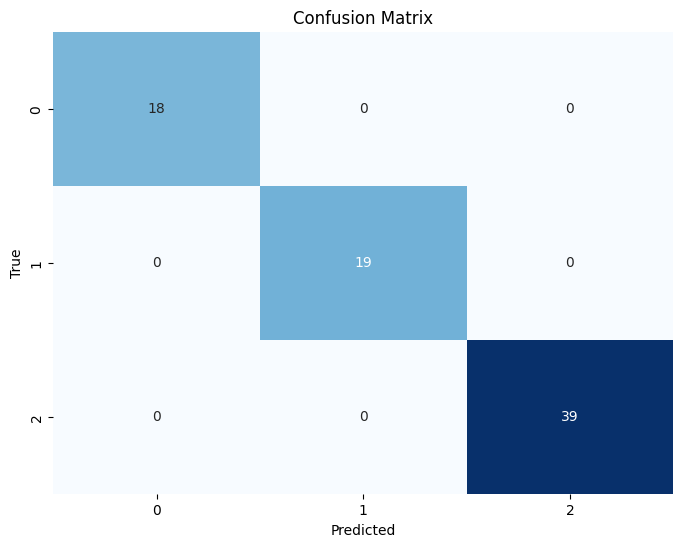

In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
# Test user provided response.
user_description = "Accident happened at engineering building abeg."

# Preprocess the user's description to match the format used during training
user_description = user_description.lower()  # Convert to lowercase
user_description = user_description.replace(r"[^\w\s]", "")  # Remove punctuation

# Vectorize the user's description using the same TF-IDF vectorizer used during training
user_description_vector = tfidf_vectorizer.transform([user_description])

# Predict the incident category using the trained model
predicted_category = svm_classifier.predict(user_description_vector)

# Map the category label to the actual category name
predicted_category_name = category_names[predicted_category[0]]

# Display the prediction
print(
    "Predicted Incident Category:",
    f"{predicted_category_name} ({predicted_category[0]})",
)

Predicted Incident Category: Fire (0)
